# 1 环境配置

# 2 基本数据处理与计算操作

## 2.1 创建Tensor

In [ ]:
import torch

In [ ]:
x = torch.empty(2, 3)
print(x)

In [ ]:
x = torch.rand(2, 3)
print(x)

In [ ]:
x = torch.zeros(2, 3, dtype=torch.long)
print(x)

In [ ]:
x = torch.tensor([[5.5, 3], [2.2, 5]])
print(x)

In [ ]:
x = x.new_ones(2, 3, dtype=torch.float64)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

In [ ]:
print(x.size())
print(x.shape)

## 2.2 Tensor的相关操作

In [ ]:
x = torch.rand(2, 3)
y = torch.rand(2, 3)
print(x + y)

print(torch.add(x, y))

y.add_(x)
print(y)

In [ ]:
y = x[0, :]
y += 1
print(y)
print(x[0, :])

In [ ]:
y = x.view(6)
z = x.view(-1, 2)
print(x.size(), y.size(), z.size())

In [ ]:
x += 1
print(x)
print(y)

In [ ]:
x_cp = x.clone().view(6)
x -= 1
print(x)
print(x_cp)

## 2.3 广播机制

In [ ]:
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

## 2.4 Tensor和Numpy相互转换

In [ ]:
a = torch.ones(3)
b = a.numpy()
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

In [ ]:
import numpy as np

a = np.ones(3)
b = torch.from_numpy(a)
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

In [ ]:
c = torch.tensor(a)
a += 1
print(a, c)

## 2.5 Tensor on GPU

In [ ]:
if torch.cuda.is_available():
    devc = torch.device("cuda")
    y = torch.ones_like(x, device=devc)
    x = x.to(devc)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

## 2.6 自动求梯度

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad_fn)

In [ ]:
y = x + 2
print(y)
print(y.grad_fn)

In [ ]:
z = y * y * 3
out = z.mean()
print(z)
print(out)

In [ ]:
a = torch.randn(2, 2)
a = (a * 3) / (a - 1)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()
out.backward()
print(x.grad)

In [ ]:
out2 = x.sum()
out2.backward()
print(x.grad)

out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x.grad)

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = 2 * x
z = y.view(2, 2)
print(z)

In [ ]:
v = torch.tensor([[1.0, 0.1], [0.01, 0.001]], dtype=torch.float)
z.backward(v)
print(x.grad)

# 3 线性回归实现

## 3.1 手动实现线性回归

### 导入所需库

In [ ]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

### 生成数据

In [ ]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(
    np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float
)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [ ]:
def use_svg_display():
    display.set_matplotlib_formats("svg")


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams["figure.figsize"] = figsize


set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

### 读取数据

In [ ]:
num_inputs = 2


# 数据迭代器 iterator
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i : min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

### 构建模型

In [ ]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [ ]:
w.requires_grad_(True)
b.requires_grad_(True)

### 前向函数

In [ ]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

### 损失函数

In [ ]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

### 优化器

In [ ]:
# stochastic gradient descent (SGD)
# 随机梯度下降
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

### 模型训练

In [ ]:
lr = 0.03
num_epochs = 128
batch_size = 64
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_1 = loss(net(features, w, b), labels).mean().item()
    print("epoch %d, loss %f" % (epoch + 1, train_1))

In [ ]:
print(true_w, "\n", w)
print(true_b, "\n", b)

## 3.2 利用torchnn实现线性回归

In [ ]:
import torch
import torch.nn as nn

### 读取数据

In [ ]:
lr = 0.03
import torch.utils.data as data

batch_size = 64
dataset = data.TensorDataset(features, labels)

data_iter = data.DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=True,  # 打乱数据
    num_workers=0,  # 读取线程数,win下为0
)

### 构建模型(nn.Module)

In [ ]:
class LinearNet(nn.Module):
    def __init__(self, n_features):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_features, 1)

    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y


net = LinearNet(num_inputs)

### 构建模型(其他方法)

In [ ]:
# 使用 nn.Sequential 构建模型
# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处可以添加其他层
)

# 写法二
# net = nn.Sequential()
# net.add_module('linear',nn.Linear(num_inputs,1))
# net.add_module(...)   # 此处可以添加其他层

# 写法三
# from collections import OrderedDict
# net = nn.Sequential(OrderedDict([
#     ('linear',nn.Linear(num_inputs,1))
#     # 此处可以添加其他层
# ]))

### 模型参数初始化

In [ ]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(
    net[0].bias, val=0
)  # 也可以直接修改bias的data：net[0].bias.data.fill_(0)
# 上述代码，将参数中的每个元素随机初始化为了均值为0，标准差为0.01的正态分布，
# 同时将偏差初始化为零

### 损失函数和优化器

In [ ]:
# 均方误差作为损失(取了均值，是标量，可以直接.backward())
loss = nn.MSELoss()

In [ ]:
import torch.optim as optim

# stochastic gradient descent
# 随机梯度下降法，学习率为0.03
optimizer = optim.SGD(net.parameters(), lr=0.03)

# 可以为不同的子网络设置不同学习率
# optimizer = optim.SGD(
#     [
#         {"params": net.subnet1.parameters(), "lr": 0.01},
#         {"params": net.subnet2.parameters(), "lr": 0.1},
#         {"params": net.subnet3.parameters(), "lr": 0.05},
#         {"params": net.subnet4.parameters(), "lr": 0.03},
#         {"params": net.subnet5.parameters(), "lr": 0.02},
#     ],
#     lr=0.03,
# )

### 模型训练

In [ ]:
num_epochs = 128
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print(f"Epoch {epoch}, loss: {l.item()}")

In [ ]:
print(true_w, "\n", w)
print(true_b, "\n", b)

## 3.3 常用损失函数

In [ ]:
# 平均绝对误差(MAE): mean absolute error
loss = nn.L1Loss()

# 均方误差(MSE): mean squared error
loss = nn.MSELoss()

# 二元交叉熵损失函数: binary cross-entropy loss
loss = nn.BCELoss()

# 包含sigmoid层的二元交叉熵损失函数: binary cross-entropy loss with sigmoid
loss = nn.BCEWithLogitsLoss()

# 交叉熵损失函数: cross-entropy loss
loss = nn.CrossEntropyLoss()  # 内含softmax运算

## 3.4 模型预测及评价

In [ ]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [ ]:
# 评价模型net在数据集data_iter上的准确率
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

# 4 实验

## 4.1 pytorch基本操作考察

### 1

In [6]:
import torch

M = torch.randint(1, 10, (1, 3))
N = torch.randint(1, 10, (2, 1))
print(M)
print(N)
# 法一
R = M - N
print(R)
# 法二
R = torch.sub(M, N)
print(R)
# 法三
R = M.sub(N)
print(R)

tensor([[7, 1, 1]])
tensor([[1],
        [4]])
tensor([[ 6,  0,  0],
        [ 3, -3, -3]])
tensor([[ 6,  0,  0],
        [ 3, -3, -3]])
tensor([[ 6,  0,  0],
        [ 3, -3, -3]])


### 2

In [7]:
import torch

P = torch.normal(mean=0, std=0.01, size=(3, 2))
Q = torch.normal(mean=0, std=0.01, size=(4, 2))
print(P)
print(Q)
QT = Q.t()  # 或者使用 Q.transpose(0, 1)
print(QT)
result = torch.mm(P, QT)  # 或者 P @ QT
print(result)

tensor([[-0.0148,  0.0056],
        [ 0.0026, -0.0145],
        [ 0.0001,  0.0071]])
tensor([[-2.9027e-03, -2.3394e-03],
        [-1.5928e-02,  1.1500e-02],
        [-1.3327e-02, -1.3171e-02],
        [-3.8744e-05,  1.9628e-03]])
tensor([[-2.9027e-03, -1.5928e-02, -1.3327e-02, -3.8744e-05],
        [-2.3394e-03,  1.1500e-02, -1.3171e-02,  1.9628e-03]])
tensor([[ 2.9908e-05,  3.0022e-04,  1.2372e-04,  1.1551e-05],
        [ 2.6372e-05, -2.0806e-04,  1.5630e-04, -2.8552e-05],
        [-1.7082e-05,  8.0270e-05, -9.5798e-05,  1.4029e-05]])


### 3

In [8]:
import torch

x = torch.tensor(1, dtype=float, requires_grad=True)
y1 = x**2
with torch.no_grad():
    y2 = x**3
y3 = y1 + y2
print(y3)
y3.backward()
print(x.grad)

print(y1.grad_fn)
print(y2.grad_fn)
print(y3.grad_fn)

tensor(2., dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(2., dtype=torch.float64)
None


## 4.2 动手实现logistic回归

### 4.2.1 数据生成

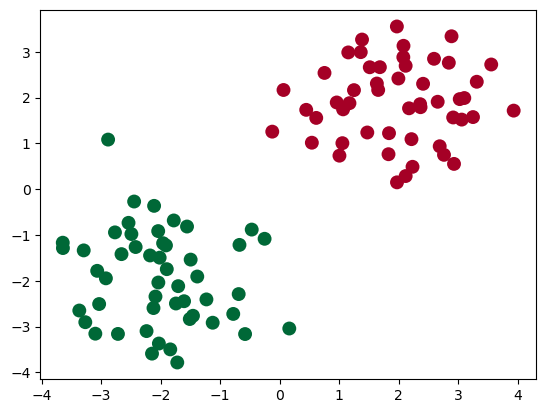

In [9]:
import torch as tc
import matplotlib.pyplot as plt

# CUDA
devc = tc.device("cuda" if tc.cuda.is_available() else "cpu")

n_data = tc.ones(50, 2)
x1 = tc.normal(2 * n_data, 1)
y1 = tc.zeros(50)
x2 = tc.normal(-2 * n_data, 1)
y2 = tc.ones(50)

x = tc.cat((x1, x2), 0).float().to(devc)
y = tc.cat((y1, y2), 0).float().to(devc)

plt.scatter(
    x.detach().cpu().numpy()[:, 0],
    x.detach().cpu().numpy()[:, 1],
    c=y.detach().cpu().numpy(),
    s=100,
    lw=0,
    cmap="RdYlGn",
)
plt.show()

### 4.2.2 手动实现

In [10]:
import torch as tc
import torch.nn as nn

#### 4.2.2.1 数据迭代器

In [11]:
def data_random_iter(batch_size, features, labels):
    num_examples = features.shape[0]
    indices = tc.randperm(num_examples, device=devc)
    for i in range(0, num_examples, batch_size):
        j = indices[i : min(i + batch_size, num_examples)]
        yield features.index_select(0, j), labels.index_select(0, j)


data_iter = data_random_iter

#### 4.2.2.2 模型

In [12]:
w = tc.normal(0, 0.01, size=(x.shape[1], 1), device=devc, requires_grad=True)
b = tc.zeros(1, 1, requires_grad=True, device=devc)


def linear_regression(X, w, b):
    return tc.addmm(b, X, w).squeeze(-1)


net = linear_regression

#### 4.2.2.3 损失函数

In [13]:
loss_BCEwithLogists = nn.BCEWithLogitsLoss()

# TODO 完全手动实现

loss = loss_BCEwithLogists

#### 4.2.2.4 优化器

In [14]:
def optim_sgd(params, lr):
    for param in params:
        param.data -= lr * param.grad
        # 若loss计算采用sum而非mean，则需要除以batch_size
        param.grad.zero_()


optimizer = optim_sgd

#### 4.2.2.5 准确度函数

In [15]:
def accuracy_binary_classification(x, y, w, b, net):
    with tc.no_grad():
        y_hat = net(x, w, b)
        acc = ((y_hat > 0.5) == y).float().mean().item()
    return acc


evaluate_accuracy = accuracy_binary_classification

#### 4.2.2.6 训练函数

In [16]:
def train(x, y, w, b, lr, batch_size, epochs):
    for epoch in range(epochs):
        epoch_loss = 0
        for x_batch, y_batch in data_iter(batch_size, x, y):
            y_hat = net(x_batch, w, b)
            los = loss(y_hat, y_batch)
            los.backward()
            optimizer([w, b], lr)
            epoch_loss += los.detach().item() / len(x_batch)
        print(f"Epoch {epoch + 1}, Loss {los.item()}")
    return w, b

#### 4.2.2.7 训练过程

In [17]:
lr = 0.03
batch_size = 32
epochs = 1024

w, b = train(x, y, w, b, lr, batch_size, epochs)
accuracy = evaluate_accuracy(x, y, w, b, net)
print(f"Accuracy: {accuracy}")

Epoch 1, Loss 0.5446394681930542
Epoch 2, Loss 0.520270586013794
Epoch 3, Loss 0.3895069658756256
Epoch 4, Loss 0.21831214427947998
Epoch 5, Loss 0.20396557450294495
Epoch 6, Loss 0.22643622756004333
Epoch 7, Loss 0.2159968912601471
Epoch 8, Loss 0.2114899754524231
Epoch 9, Loss 0.11676482111215591
Epoch 10, Loss 0.15307040512561798
Epoch 11, Loss 0.11494013667106628
Epoch 12, Loss 0.11298815906047821
Epoch 13, Loss 0.0813722014427185
Epoch 14, Loss 0.06891965866088867
Epoch 15, Loss 0.08855414390563965
Epoch 16, Loss 0.09041810035705566
Epoch 17, Loss 0.09878945350646973
Epoch 18, Loss 0.10723896324634552
Epoch 19, Loss 0.19973254203796387
Epoch 20, Loss 0.09141284972429276
Epoch 21, Loss 0.07173530012369156
Epoch 22, Loss 0.0695040374994278
Epoch 23, Loss 0.08113541454076767
Epoch 24, Loss 0.06667429208755493
Epoch 25, Loss 0.07302924245595932
Epoch 26, Loss 0.1959974467754364
Epoch 27, Loss 0.12572334706783295
Epoch 28, Loss 0.1323714703321457
Epoch 29, Loss 0.05123528465628624
Epoc

### 4.2.3 torch.nn实现

In [18]:
import torch as tc
import torch.nn as nn
from torch.nn import init
import torch.optim as optim
import torch.utils.data as tata

#### 4.2.3.1 数据迭代器

In [19]:
def get_data_iter(x, y, batch_size):
    dataset = tata.TensorDataset(x, y)
    return tata.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

#### 4.2.3.2 模型

In [20]:
class LinearNet(nn.Module):
    def __init__(self, n_features):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return self.linear(x).squeeze(-1)


def get_net(n_features, device):
    net = LinearNet(n_features).to(device)
    init.normal_(net.linear.weight, mean=0, std=0.01)
    init.constant_(net.linear.bias, val=0)
    return net

#### 4.2.3.3 损失函数

In [21]:
loss_fn = nn.BCEWithLogitsLoss()

#### 4.2.3.4 优化器

In [22]:
def get_optimizer(net, lr):
    return optim.SGD(net.parameters(), lr=lr)

#### 4.2.3.5 准确度函数

In [23]:
def evaluate_accuracy(data_iter, net, device):
    acc_sum, n = 0.0, 0
    net.eval()
    with tc.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            acc_sum += ((y_hat > 0) == y).float().sum().item()
            n += y.shape[0]
    net.train()
    return acc_sum / n

#### 4.2.3.6 训练函数

In [24]:
def train(net, data_iter, loss_fn, optimizer, epochs, device):
    net.train()
    for epoch in range(epochs):
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss_fn(y_hat, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}, Loss {l.item()}")

#### 4.2.3.7 训练过程

In [25]:
lr = 0.03
batch_size = 32
epochs = 1024

# 创建组件
data_iter = get_data_iter(x, y, batch_size)
net = get_net(x.shape[1], devc)
optimizer = get_optimizer(net, lr)

# 训练
train(net, data_iter, loss_fn, optimizer, epochs, devc)

# 评估
acc = evaluate_accuracy(data_iter, net, devc)
print(f"Accuracy: {acc}")

Epoch 1, Loss 0.5460803508758545
Epoch 2, Loss 0.43207886815071106
Epoch 3, Loss 0.2650255262851715
Epoch 4, Loss 0.2153138816356659
Epoch 5, Loss 0.24766309559345245
Epoch 6, Loss 0.1770092248916626
Epoch 7, Loss 0.20965346693992615
Epoch 8, Loss 0.0965786725282669
Epoch 9, Loss 0.1539195030927658
Epoch 10, Loss 0.13959640264511108
Epoch 11, Loss 0.12644287943840027
Epoch 12, Loss 0.14448332786560059
Epoch 13, Loss 0.07996219396591187
Epoch 14, Loss 0.1338777095079422
Epoch 15, Loss 0.058747705072164536
Epoch 16, Loss 0.06963939964771271
Epoch 17, Loss 0.1217808723449707
Epoch 18, Loss 0.12886302173137665
Epoch 19, Loss 0.10008712112903595
Epoch 20, Loss 0.06939303874969482
Epoch 21, Loss 0.05610815808176994
Epoch 22, Loss 0.1321209967136383
Epoch 23, Loss 0.03873277083039284
Epoch 24, Loss 0.055882781744003296
Epoch 25, Loss 0.10731258243322372
Epoch 26, Loss 0.07331955432891846
Epoch 27, Loss 0.06522133946418762
Epoch 28, Loss 0.09440544992685318
Epoch 29, Loss 0.04029667750000954
E

## 4.3 动手实现softmax回归

### 4.3.1 获取数据

In [166]:
import torch as tc
import torchvision as tcvs
import torch.utils.data as tata
import torchvision.transforms as trans

devc = tc.device("cuda" if tc.cuda.is_available() else "cpu")

In [167]:
mnist_train = tcvs.datasets.FashionMNIST(
    root="Datasets",
    train=True,
    download=False,
    transform=trans.ToTensor(),
)
mnist_test = tcvs.datasets.FashionMNIST(
    root="Datasets",
    train=False,
    download=False,
    transform=trans.ToTensor(),
)

In [168]:
def train_iter(batch_size=1):
    return tata.DataLoader(
        dataset=mnist_train,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True,
    )


def test_iter(batch_size=1):
    return tata.DataLoader(
        dataset=mnist_test,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True,
    )

### 4.3.2 手动实现

#### 4.3.2.1 构建模型

In [169]:
w = tc.normal(mean=0, std=0.1, size=(784, 10), requires_grad=True, device=devc)
b = tc.zeros(size=(1, 10), requires_grad=True, device=devc)


def net(x, w, b):
    x = x.view(-1, w.shape[0])
    return x @ w + b

#### 4.3.2.2 定义损失函数

In [170]:
def cross_entropy(y_hat, y):
    # 先log后softmax ，则yk = zk - log(∑e^z_i)
    log_probs = y_hat - y_hat.logsumexp(dim=1, keepdim=True)
    loss = -log_probs[tc.arange(y_hat.size(0)), y].mean()
    return loss


def loss(y_hat, y):
    return cross_entropy(y_hat, y)

#### 4.3.2.3 优化器

In [171]:
def optim_SGD(params, lr):
    with tc.no_grad():
        for param in params:
            param.data -= lr * param.grad
            param.grad.zero_()


def optimizer(params, lr):
    optim_SGD(params, lr)

#### 4.3.2.4 计算准确率

In [172]:
def accuracy(y_hat, y):
    # 对多分类 logits，取预测类别
    if y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(dim=1)
    cmp = (y_hat == y)
    return float(cmp.float().mean())


#### 4.3.2.5 训练函数

In [173]:
def train(w, b, lr, num_epochs, batch_size):
    for epoch in range(num_epochs):
        train_los = 0
        train_acc = 0
        batch_num = 0
        total_num = 0
        for x_batch, y_batch in train_iter(batch_size=batch_size):
            x_batch, y_batch = x_batch.to(devc, non_blocking=True), y_batch.to(
                devc, non_blocking=True
            )
            y_hat = net(x_batch, w, b)
            los = loss(y_hat, y_batch)
            los.backward()
            with tc.no_grad():
                optimizer([w, b], lr)
                batch_num = y_batch.shape[0]
                total_num += batch_num
                train_los += los.item() * batch_num
                train_acc += accuracy(y_hat, y_batch) * batch_num
        with tc.no_grad():
            train_los /= total_num
            train_acc /= total_num
        print(f"epoch {epoch + 1}, loss {train_los:f}, acc {train_acc:f}")
    return (w, b)

#### 4.3.2.6 训练过程

In [174]:
batch_size = 1024
num_epochs = 64
lr = 0.03

(w, b) = train(w, b, lr, num_epochs, batch_size)

epoch 1, loss 1.748133, acc 0.403483
epoch 2, loss 1.089928, acc 0.638100
epoch 3, loss 0.927044, acc 0.688350
epoch 4, loss 0.844859, acc 0.715333
epoch 5, loss 0.792274, acc 0.734500
epoch 6, loss 0.754811, acc 0.747150
epoch 7, loss 0.726164, acc 0.757050
epoch 8, loss 0.703221, acc 0.764650
epoch 9, loss 0.684254, acc 0.772783
epoch 10, loss 0.668347, acc 0.778167
epoch 11, loss 0.654747, acc 0.783417
epoch 12, loss 0.642600, acc 0.787117
epoch 13, loss 0.631993, acc 0.790367
epoch 14, loss 0.622718, acc 0.793733
epoch 15, loss 0.614196, acc 0.796800
epoch 16, loss 0.606656, acc 0.799267
epoch 17, loss 0.599590, acc 0.801233
epoch 18, loss 0.593199, acc 0.803767
epoch 19, loss 0.587368, acc 0.805050
epoch 20, loss 0.581903, acc 0.806500
epoch 21, loss 0.576605, acc 0.808867
epoch 22, loss 0.571970, acc 0.810183
epoch 23, loss 0.567497, acc 0.811317
epoch 24, loss 0.563334, acc 0.813283
epoch 25, loss 0.559381, acc 0.813467
epoch 26, loss 0.555707, acc 0.815400
epoch 27, loss 0.5522

### 4.3.3 torchrch.nn实现